In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# -------------------------------
# 1. Load dataset
# -------------------------------
df = pd.read_csv("house_prices1.csv")

# -------------------------------
# 2. Select Features for Clustering
# -------------------------------
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt', 'LotArea']

# Drop rows with missing values in the selected features
df = df.dropna(subset=features)

# Extract the feature data
X = df[features]

# -------------------------------
# 3. Scale the features
# -------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------
# 4. Apply K-Means Clustering
# -------------------------------
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# -------------------------------
# 5. View results
# -------------------------------
print(df["Cluster"].value_counts())
print(df.groupby("Cluster")[features].mean())


Cluster
0    150
2     58
1     20
Name: count, dtype: int64
         OverallQual    GrLivArea  GarageCars  TotalBsmtSF    YearBuilt  \
Cluster                                                                   
0           6.653333  1820.800000    2.006667  1061.040000  1998.106667   
1           6.850000  1733.950000    1.450000   885.900000  1938.650000   
2           8.241379  2534.310345    3.120690  1426.293103  2007.431034   

              LotArea  
Cluster                
0         9624.526667  
1         8646.100000  
2        12225.862069  


c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [5]:

# Show cluster centers
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=features)
print("=== Cluster Centers (Scaled Values) ===")
print(centroids, "\n")


=== Cluster Centers (Scaled Values) ===
   OverallQual  GrLivArea  GarageCars  TotalBsmtSF  YearBuilt   LotArea
0    -0.429079  -0.438028   -0.244563    -0.320462   0.138391 -0.317075
1    -0.228747  -0.656804   -0.824966    -1.044177  -2.755310 -0.855754
2     1.188566   1.359314    0.916962     1.188841   0.592199  1.115108 



In [6]:
# 3 PCA for 2D Visualization
# -------------------------------
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

df["PCA1"] = pca_result[:, 0]
df["PCA2"] = pca_result[:, 1]


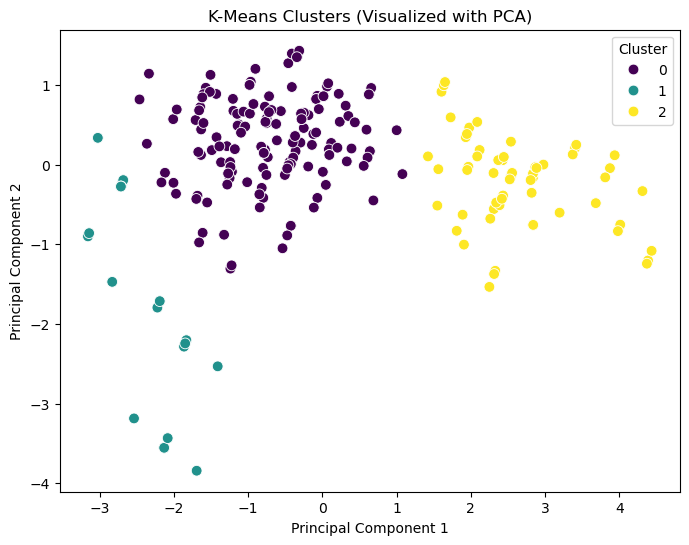

In [7]:
# 4️⃣ Plot the Clusters
# -------------------------------
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=df, palette="viridis", s=60)
plt.title("K-Means Clusters (Visualized with PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

In [8]:
# 5 Analyze Cluster Patterns
# -------------------------------
cluster_summary = df.groupby("Cluster")[features + ["SalePrice"]].mean().round(2)
print("=== Cluster Summary (Average Feature Values) ===")
print(cluster_summary, "\n")

=== Cluster Summary (Average Feature Values) ===
         OverallQual  GrLivArea  GarageCars  TotalBsmtSF  YearBuilt   LotArea  \
Cluster                                                                         
0               6.65    1820.80        2.01      1061.04    1998.11   9624.53   
1               6.85    1733.95        1.45       885.90    1938.65   8646.10   
2               8.24    2534.31        3.12      1426.29    2007.43  12225.86   

         SalePrice  
Cluster             
0        217732.14  
1        151563.16  
2        320277.78   



In [9]:
# Summary
# -------------------------------
print("""
Week 8 Completed
- Applied K-Means clustering (3 clusters)
- Reduced dimensions using PCA for 2D visualization
- Found feature patterns across clusters
- Ready to include unsupervised analysis in final report
""")


Week 8 Completed
- Applied K-Means clustering (3 clusters)
- Reduced dimensions using PCA for 2D visualization
- Found feature patterns across clusters
- Ready to include unsupervised analysis in final report

